In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
data = pd.read_csv("/content/IMDb Movies India.csv", encoding="latin1")

In [ ]:
data = data.dropna(subset=['Rating'])

In [ ]:
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    data.loc[:, col] = data[col].fillna('Unknown')

In [ ]:
data.loc[:, 'Main_Genre'] = data['Genre'].apply(lambda x: x.split(',')[0].strip())

In [ ]:
features = ['Main_Genre', 'Director', 'Actor 1']
X = data[features]

In [ ]:
y = data['Rating'].astype(float)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
categorical_features = features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Main_Genre', 'Director',
                                                   'Actor 1'])])),
                ('regressor', LinearRegression())])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set: {mse:.3f}")

Mean Squared Error on test set: 1.833


In [ ]:
results = X_test.copy()
results['Actual Rating'] = y_test
results['Predicted Rating'] = y_pred
print(results.head(10))

      Main_Genre           Director                Actor 1  Actual Rating  \
9456     Romance  Gautam Siddhartha           Akshay Anand            3.3   
14816     Action    Ram Gopal Varma          Sachiin Joshi            5.3   
3213      Action        Aditya Datt         Vidyut Jammwal            5.7   
3778       Drama  Ashwini Chaudhary                Om Puri            7.2   
5775      Horror       Suraj Bharti      Sahilraj Dewangen            3.5   
12203     Action   Tigmanshu Dhulia        Jimmy Sheirgill            7.2   
12305      Drama       Vinay Shukla     Mithun Chakraborty            3.8   
4650       Drama  Madhur Bhandarkar  Priyanka Chopra Jonas            6.9   
8701       Drama       Kundan Kumar             Mala Sinha            5.2   
4707       Drama        Nandita Das             Inaamulhaq            7.4   

       Predicted Rating  
9456           4.402041  
14816          6.905422  
3213           5.373747  
3778           5.009374  
5775           5.37046

In [ ]:
sample_size = 15
sample_indices = np.random.choice(X_test.index, size=sample_size, replace=False)
sample_actual = y_test.loc[sample_indices]
sample_predicted = pd.Series(y_pred, index=X_test.index).loc[sample_indices]

In [ ]:
comparison_df = pd.DataFrame({
    'Actual Rating': sample_actual,
    'Predicted Rating': sample_predicted
}).sort_index()

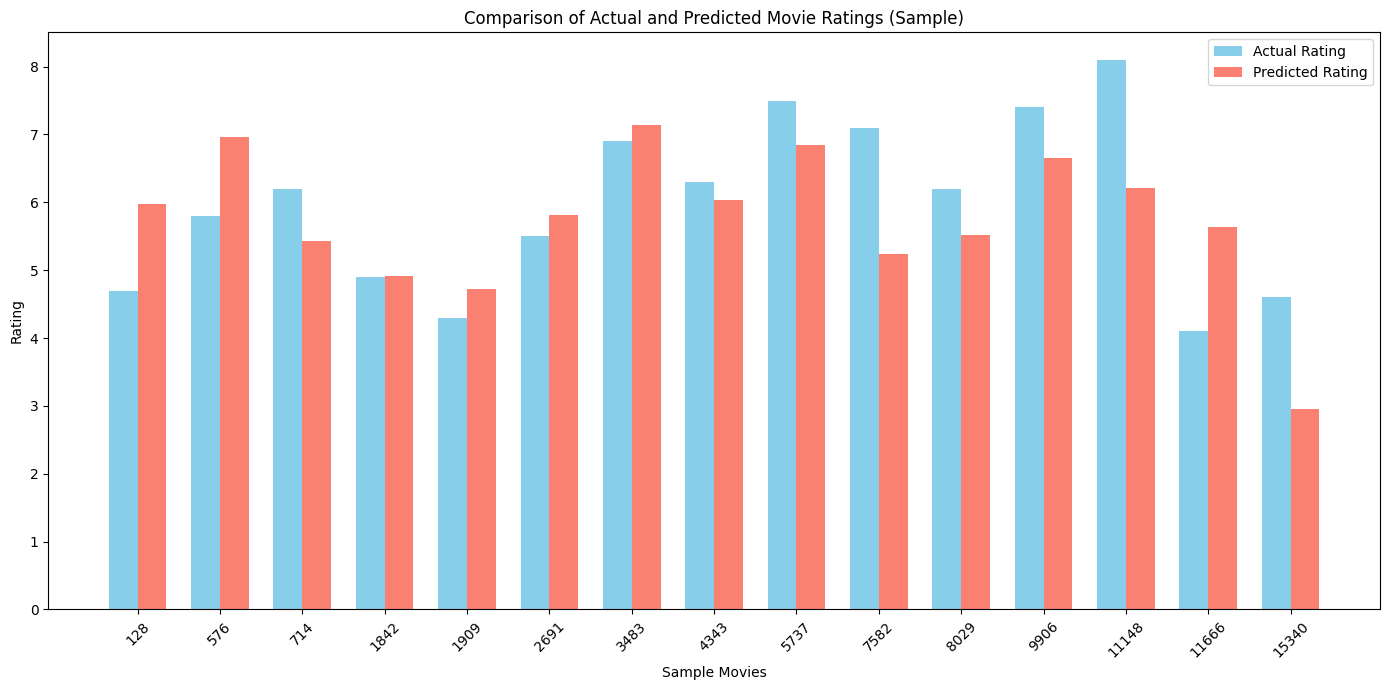

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
bar_width = 0.35
indices = np.arange(sample_size)
plt.bar(indices, comparison_df['Actual Rating'], width=bar_width, label='Actual Rating', color='skyblue')
plt.bar(indices + bar_width, comparison_df['Predicted Rating'], width=bar_width, label='Predicted Rating', color='salmon')
plt.xlabel('Sample Movies')
plt.ylabel('Rating')
plt.title('Comparison of Actual and Predicted Movie Ratings (Sample)')
plt.xticks(indices + bar_width / 2, comparison_df.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()